### Relative Abundance

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import seaborn as sns
from scipy.stats import shapiro, kruskal, f_oneway


data_dir = 'Alien_data'
    
%matplotlib inline

In [2]:
data = q2.Artifact.load(f'{data_dir}/dada2_table.qza').view(pd.DataFrame)

In [3]:
data.head()

,2484b3ed876e3e6a9467ecee55b33074,d51e156a1ef97d421bddbb8e2bde990f,c4f9da8bc8fa300c3ea6cd5b51fecdb4,fb867a2811e2012044770f9d0d8b488e,f74040aa66b451ec18a33cb30ec79371,75036f93e97764cd6ef5f390ccb115c7,e06423e8099caf4980cd95c0bc724303,7a69a28a37791ae2af9d0940ec9bc83c,ab0a5febf1575797dcc91d1e1e168b4b,298dafbc3a1a1d7422c17b09790f0e05,...,54b3eaa06ebe99f8e0f088c9444c8303,456bf81a8a16715edf28d614e272151f,c910bfc56f5101423f27f3bb85b62e38,31e9d1685aa9e5705c1c6b03afc33b47,596600f16c82eacb230844d76ee7a5cb,a5e32b37a4f30bfdd7d1044c3fbdd587,3a0fc378c11f22fc8238fe6dee966b33,8af656c19910644fe10cf38693bba2bc,44d5af9582557d7acf0c36ce91cecd7f,82a3495ad56c594e50e6eddceb616012
0DOSLC,234007.0,17.0,20452.0,14815.0,29.0,29.0,73.0,7.0,32647.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0KB68F,799.0,1117.0,314.0,28.0,0.0,0.0,23.0,1310.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0TR6O2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0UWI7J,43.0,827.0,74.0,0.0,3.0,57.0,0.0,952.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0WG67D,158847.0,19.0,6205.0,8598.0,23.0,34.0,1522.0,13.0,4901.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
n = 20

# draw n ASVs out of the original DataFrame
data_samp = data.sample(n=n, axis=1, random_state=234)

# create a new DataFrame with three columns (sample, ASV, abundance)
col_names = {'level_0': 'sample', 'level_1': 'asv', 0: 'count'}
data_plot = data_samp.stack().reset_index().rename(columns=col_names)
data_plot.head()

,sample,asv,count
0,0DOSLC,5470ee1247b8858827d6a54fe349072f,0.0
1,0DOSLC,40d0579d8984ee5c50913e6bb9cbfed6,0.0
2,0DOSLC,731dc5f1cd49d20bb33a99f5235d4abd,0.0
3,0DOSLC,771b52764e42263220b0fb659d7d73a6,0.0
4,0DOSLC,304efa8140d78b2acffe334ff4208f8f,0.0


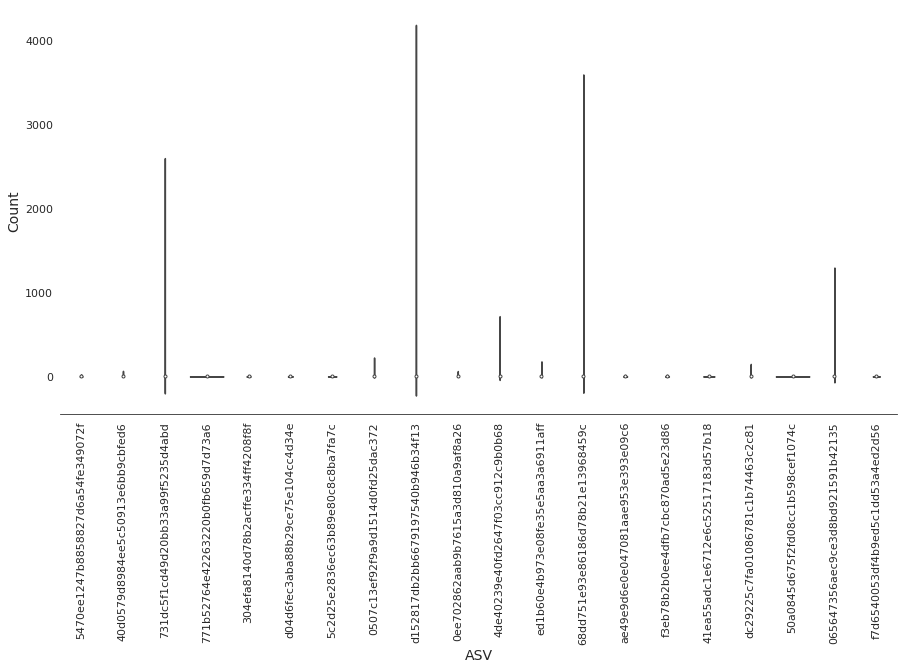

In [5]:
with sns.axes_style('white'), sns.color_palette('Set1'):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7.5)
    
    sns.violinplot(data=data_plot, x='asv', y='count', ax=ax)
    sns.despine(left=True)
    
    # adjust tick labels and axes titles
    ax.tick_params(axis='x', rotation=90, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.set_xlabel('ASV', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

#### Creating dataframe of all significant features (from 'data')

In [14]:
alpha = 0.05
results = {}

# iterate through rows (samples) and test each of them for normality
for asv_name, asv_values in data.iteritems():
    stat, p = shapiro(asv_values)
    results[asv_name] = p

# convert test results into a DataFrame
results_df = pd.DataFrame(data=results.values(), index=results.keys(), columns=['p'])

# add a new column with a descriptive test result
results_df['is_normal'] = results_df['p'] > alpha

In [15]:
results_df

,p,is_normal
2484b3ed876e3e6a9467ecee55b33074,5.845393e-25,False
d51e156a1ef97d421bddbb8e2bde990f,9.143686e-26,False
c4f9da8bc8fa300c3ea6cd5b51fecdb4,6.697085e-25,False
fb867a2811e2012044770f9d0d8b488e,1.926959e-25,False
f74040aa66b451ec18a33cb30ec79371,2.048726e-27,False
...,...,...
a5e32b37a4f30bfdd7d1044c3fbdd587,1.115372e-27,False
3a0fc378c11f22fc8238fe6dee966b33,1.115372e-27,False
8af656c19910644fe10cf38693bba2bc,1.115372e-27,False
44d5af9582557d7acf0c36ce91cecd7f,1.115372e-27,False


In [16]:
# Checking whether any ASVs have a normal distribution

print('Number of ASVs with normal distribution:', results_df['is_normal'].sum())

Number of ASVs with normal distribution: 0


#### ANCOM

In [17]:
# Filtering feature table to improve resolution and limit FDR. keeping only features that are present 
# at frequency ≥25 and in at least 4 samples. 

! qiime feature-table filter-features \
    --i-table $data_dir/dada2_table.qza \
    --p-min-frequency 25 \
    --p-min-samples 4 \
    --o-filtered-table $data_dir/table_abund.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund.qza


In [18]:
# Add pseudocount to FeatureTable[Frequency] to remove the zeros from table 
# Convert table into a FeatureTable[Composition]
! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund.qza \
    --o-composition-table $data_dir/table_abund_comp.qza

Saved FeatureTable[Composition] to: Alien_data/table_abund_comp.qza


In [29]:
# Looking at differential abundance between abducted and non-abducted individuals

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp.qza \
    --m-metadata-file shared_data/metadata/str_metadata.tsv \
    --m-metadata-column alleged_abduction \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_abduction.qzv

Saved Visualization to: Alien_data/ancom_abduction.qzv


In [6]:
Visualization.load(f'{data_dir}/ancom_abduction.qzv')

<visualization: Visualization uuid: 605c89a1-39d6-4d64-9d40-7bdcee6aa07d>

In [27]:
#look at the taxa annotation that is different between the abducted and non-abducted patients:
! qiime taxa collapse \
    --i-table $data_dir/table_abund.qza \
    --i-taxonomy $data_dir/taxonomy.qza \
    --p-level 7 \
    --o-collapsed-table $data_dir/table_abund_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_l7.qza


In [28]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[alleged_abduction]='abducted' or [alleged_abduction]='non_abducted'" \
    --o-filtered-table $data_dir/table_abund_abductionl7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_abductionl7.qza \
    --o-composition-table $data_dir/table_abund_comp_abductionl7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_abductionl7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_abductionl7.qza


In [24]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_abductionl7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column alleged_abduction \
    --o-visualization $data_dir/ancom_abduction_l7.qzv

Saved Visualization to: Alien_data/ancom_abduction_l7.qzv


In [18]:
Visualization.load(f'{data_dir}/ancom_abduction_l7.qzv')

<visualization: Visualization uuid: f417a1ec-6956-453e-b8a5-6ec0e1cf37b9>

In [17]:
#collapse the level at level 2:
! qiime taxa collapse \
    --i-table $data_dir/table_abund.qza \
    --i-taxonomy $data_dir/taxonomy.qza \
    --p-level 2 \
    --o-collapsed-table $data_dir/table_abund_l2.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_l2.qza


In [18]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l2.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[alleged_abduction]='abducted' or [alleged_abduction]='non_abducted'" \
    --o-filtered-table $data_dir/table_abund_abductionl2.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_abductionl2.qza \
    --o-composition-table $data_dir/table_abund_comp_abductionl2.qza

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_abductionl2.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column alleged_abduction \
    --o-visualization $data_dir/ancom_abduction_l2.qzv

Saved FeatureTable[Frequency] to: Alien_data/table_abund_abductionl2.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_abductionl2.qza
Saved Visualization to: Alien_data/ancom_abduction_l2.qzv


In [19]:
Visualization.load(f'{data_dir}/ancom_abduction_l2.qzv')

<visualization: Visualization uuid: 787fcd15-8c36-4f48-b0f4-7518110beace>

In [22]:
#collapse the level at level 3:
! qiime taxa collapse \
    --i-table $data_dir/table_abund.qza \
    --i-taxonomy $data_dir/taxonomy.qza \
    --p-level 3 \
    --o-collapsed-table $data_dir/table_abund_l3.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_l3.qza


In [20]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l3.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[alleged_abduction]='abducted' or [alleged_abduction]='non_abducted'" \
    --o-filtered-table $data_dir/table_abund_abductionl3.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_abductionl3.qza \
    --o-composition-table $data_dir/table_abund_comp_abductionl3.qza

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_abductionl3.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column alleged_abduction \
    --o-visualization $data_dir/ancom_abduction_l3.qzv

Usage: qiime feature-table filter-samples [OPTIONS]

  Filter samples from table based on frequency and/or metadata. Any features
  with a frequency of zero after sample filtering will also be removed. See
  the filtering tutorial on https://docs.qiime2.org for additional details.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency¹ | RelativeFrequency² |
    PresenceAbsence³ | Composition⁴]
                       The feature table from which samples should be
                       filtered.                                    [required]
Parameters:
  --p-min-frequency INTEGER
                       The minimum total frequency that a sample must have to
                       be retained.                               [default: 0]
  --p-max-frequency INTEGER
                       The maximum total frequency that a sample can have to
                       be retained. If no value is provided this will default
                       to infinity (i.e., no maximum frequency filter will 

In [24]:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l3.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[alleged_abduction]='abducted' or [alleged_abduction]='non_abducted'" \
    --o-filtered-table $data_dir/table_abund_abductionl3.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_abductionl3.qza \
    --o-composition-table $data_dir/table_abund_comp_abductionl3.qza

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_abductionl3.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column alleged_abduction \
    --o-visualization $data_dir/ancom_abduction_l3.qzv

Saved FeatureTable[Frequency] to: Alien_data/table_abund_abductionl3.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_abductionl3.qza
Saved Visualization to: Alien_data/ancom_abduction_l3.qzv


In [25]:
Visualization.load(f'{data_dir}/ancom_abduction_l3.qzv')

<visualization: Visualization uuid: f1f311a6-3ead-4ac1-bf41-7cc2a528816d>

In [15]:
# Visualize the relative abundance:
! qiime taxa barplot \
    --i-table $data_dir/table_abund.qza \
    --i-taxonomy $data_dir/taxonomy.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --o-visualization $data_dir/taxa-bar-plots.qzv

Saved Visualization to: Alien_data/taxa-bar-plots.qzv


In [16]:
Visualization.load(f'{data_dir}/taxa-bar-plots.qzv')

<visualization: Visualization uuid: 7724d483-087b-4ea4-ae12-0ac3ff56f69a>

In [7]:
# Looking at differential abundance between the two hct source 

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column hct_source \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_hct_source.qzv

Saved Visualization to: Alien_data/ancom_hct_source.qzv


In [19]:
Visualization.load(f'{data_dir}/ancom_hct_source.qzv')

<visualization: Visualization uuid: bec00a8d-4343-46f4-84ed-fee7982f38dc>

In [14]:
#look at the taxa annotation that is different between the hct source:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[hct_source]='cord' or [hct_source]='PBSC_unmodified'" \
    --o-filtered-table $data_dir/table_abund_hct_sourcel7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_hct_sourcel7.qza \
    --o-composition-table $data_dir/table_abund_comp_hct_sourcel7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_hct_sourcel7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_hct_sourcel7.qza


In [15]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_hct_sourcel7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column hct_source \
    --o-visualization $data_dir/ancom_hct_source_l7.qzv

Saved Visualization to: Alien_data/ancom_hct_source_l7.qzv


In [16]:
Visualization.load(f'{data_dir}/ancom_hct_source_l7.qzv')

<visualization: Visualization uuid: 2a38fd93-92fa-4087-970b-d6b183b730fd>

In [20]:
# Looking at differential abundance between the stool consistency:

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column stool_consistency \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_stool_consistency.qzv

Saved Visualization to: Alien_data/ancom_stool_consistency.qzv


In [21]:
Visualization.load(f'{data_dir}/ancom_stool_consistency.qzv')

<visualization: Visualization uuid: 87a6f645-592e-4fa4-947a-faa83a78b2a6>

In [31]:
#look at the taxa annotation that is different between the formed and semi-formed stool:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[stool_consistency]='formed' or [stool_consistency]='semi-formed'" \
    --o-filtered-table $data_dir/table_abund_stool_formed_semi_formed_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_stool_formed_semi_formed_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_formed_semi_formed_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_stool_formed_semi_formed_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_formed_semi_formed_l7.qza


In [32]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_formed_semi_formed_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column stool_consistency \
    --o-visualization $data_dir/ancom_stool_formed_semi_formed_l7.qzv

Saved Visualization to: Alien_data/ancom_stool_formed_semi_formed_l7.qzv


In [34]:
Visualization.load(f'{data_dir}/ancom_stool_formed_semi_formed_l7.qzv')

<visualization: Visualization uuid: 0b1339b5-997f-48ce-9801-b9a3bcde3cff>

In [35]:
#look at the taxa annotation that is different between the formed and liquid stool:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[stool_consistency]='formed' or [stool_consistency]='liquid'" \
    --o-filtered-table $data_dir/table_abund_stool_formed_liquid_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_stooll7.qza \
    --o-composition-table $data_dir/table_abund_comp_stool_formed_liquid_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_stool_formed_liquid_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_stool_formed_liquid_l7.qza


In [39]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_stool_formed_liquid_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column stool_consistency \
    --o-visualization $data_dir/ancom_stool_formed_liquid_l7.qzv

Saved Visualization to: Alien_data/ancom_stool_formed_liquid_l7.qzv


In [40]:
Visualization.load(f'{data_dir}/ancom_stool_formed_liquid_l7.qzv')

<visualization: Visualization uuid: d33a2f95-202f-449d-b71f-91fc3c384744>

In [41]:
#look at the taxa annotation that is different between the semi-formed and liquid stool:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[stool_consistency]='semi-formed' or [stool_consistency]='liquid'" \
    --o-filtered-table $data_dir/table_abund_stool_semi_formed_liquid_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_stool_semi_formed_liquid_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_stool_semi_formed_liquid_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_stool_semi_formed_liquid_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_stool_semi_formed_liquid_l7.qza


In [42]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_stool_semi_formed_liquid_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column stool_consistency \
    --o-visualization $data_dir/ancom_stool_formed_semi_formed_liquid_l7.qzv

Saved Visualization to: Alien_data/ancom_stool_formed_semi_formed_liquid_l7.qzv


In [43]:
#no significance was found
Visualization.load(f'{data_dir}/ancom_stool_formed_semi_formed_liquid_l7.qzv')

<visualization: Visualization uuid: ea63aac5-fa88-422a-a639-196446664e0b>

In [44]:
# Looking at differential abundance between the disease:

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column disease \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_disease.qzv

Saved Visualization to: Alien_data/ancom_disease.qzv


In [45]:
Visualization.load(f'{data_dir}/ancom_disease.qzv')

<visualization: Visualization uuid: f84c5e71-49c5-4673-8119-1dc0debbe963>

In [53]:
metadata['disease'].unique()

array(['Myelodysplastic Syndromes', 'Leukemia', "Non-Hodgkin's Lymphoma",
       "Hodgkin's Disease", nan], dtype=object)

In [54]:
#look at the taxa annotation that is different between the Mye syndromes and Leukemia:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[disease]='Myelodysplastic Syndromes' or [disease]='Leukemia'" \
    --o-filtered-table $data_dir/table_abund_Myesyndromes_Leukemia_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_Myesyndromes_Leukemia_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_Myesyndromes_Leukemia_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_Myesyndromes_Leukemia_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_Myesyndromes_Leukemia_l7.qza


In [48]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_Myesyndromes_Leukemia_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column disease \
    --o-visualization $data_dir/ancom_stool_Myesyndromes_Leukemia_l7.qzv

Saved Visualization to: Alien_data/ancom_stool_Myesyndromes_Leukemia_l7.qzv


In [49]:
Visualization.load(f'{data_dir}/ancom_stool_Myesyndromes_Leukemia_l7.qzv')

<visualization: Visualization uuid: 189105e8-e223-47c7-951e-5b0886a1c1db>

In [61]:
#look at the taxa annotation that is different between the Non-Hodgkin's Lymphoma and Leukemia:
#error message!!! There was an issue with loading the file /str_metadata.tsv as metadata
# I also failed to test the other pairs of dieseases
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[disease]='Non-Hodgkin's Lymphoma' or [disease]='Leukemia'" \
    --o-filtered-table $data_dir/table_abund_nonHodgkin_Leukemia_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_nonHodgkin_Leukemia_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_nonHodgkin_Leukemia_l7.qza

There was an issue with loading the file /str_metadata.tsv as metadata:

  Metadata file path doesn't exist, or the path points to something other than a file. Please check that the path exists, has read permissions, and points to a regular file (not a directory): /str_metadata.tsv

  There may be more errors present in the metadata file. To get a full report, sample/feature metadata files can be validated with Keemei: https://keemei.qiime2.org

  Find details on QIIME 2 metadata requirements here: https://docs.qiime2.org/2022.2/tutorials/metadata/

Usage: qiime composition add-pseudocount [OPTIONS]

  Increment all counts in table by pseudocount.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency]
                       The feature table to which pseudocounts should be
                       added.                                       [required]
Parameters:
  --p-pseudocount INTEGER
                       The value to add to all counts in the feature table.
                        

In [62]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_nonHodgkin_Leukemia_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column disease \
    --o-visualization $data_dir/ancom_stool_nonHodgkin_Leukemia_l7.qzv

Usage: qiime composition ancom [OPTIONS]

  Apply Analysis of Composition of Microbiomes (ANCOM) to identify features
  that are differentially abundant across groups.

Inputs:
  --i-table ARTIFACT FeatureTable[Composition]
                       The feature table to be used for ANCOM computation.
                                                                    [required]
Parameters:
  --m-metadata-file METADATA
  --m-metadata-column COLUMN  MetadataColumn[Categorical]
                       The categorical sample metadata column to test for
                       differential abundance across.               [required]
  --p-transform-function TEXT Choices('sqrt', 'log', 'clr')
                       The method applied to transform feature values before
                       generating volcano plots.              [default: 'clr']
  --p-difference-function TEXT Choices('mean_difference', 'f_statistic')
                       The method applied to visualize fold difference in
       

In [60]:
Visualization.load(f'{data_dir}/ancom_stool_nonHodgkin_Leukemia_l7.qzv')

<visualization: Visualization uuid: 9327b9b0-81f2-42e9-946d-049085ff7457>

In [ ]:
# Looking at differential abundance between the categorical_time_relative_to_engraftment:

! qiime composition ancom \
    --i-table $data_dir/table_abund_comp.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column categorical_time_relative_to_engraftment \
    --p-transform-function log \
    --o-visualization $data_dir/ancom_categorical_time_relative_to_engraftment.qzv

Saved Visualization to: Alien_data/ancom_categorical_time_relative_to_engraftment.qzv


In [4]:
Visualization.load(f'{data_dir}/ancom_categorical_time_relative_to_engraftment.qzv')

<visualization: Visualization uuid: c102d9d2-35df-4043-b9b6-8e593ff9cae1>

In [5]:
#look at the taxa annotation that is different between the peri and pre:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[categorical_time_relative_to_engraftment]='pre' or [categorical_time_relative_to_engraftment]='peri'" \
    --o-filtered-table $data_dir/table_abund_pre_peri_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_pre_peri_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_pre_peri_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_pre_peri_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_pre_peri_l7.qza


In [6]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_pre_peri_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column categorical_time_relative_to_engraftment \
    --o-visualization $data_dir/ancom_pre_peri_l7.qzv

Saved Visualization to: Alien_data/ancom_pre_peri_l7.qzv


In [7]:
Visualization.load(f'{data_dir}/ancom_pre_peri_l7.qzv')

<visualization: Visualization uuid: 3d63714e-f8b9-44e0-9a69-a295170231ee>

In [8]:
#look at the taxa annotation that is different between the peri and post:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[categorical_time_relative_to_engraftment]='peri' or [categorical_time_relative_to_engraftment]='post'" \
    --o-filtered-table $data_dir/table_abund_peri_post_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_peri_post_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_peri_post_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_peri_post_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_peri_post_l7.qza


In [9]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_peri_post_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column categorical_time_relative_to_engraftment \
    --o-visualization $data_dir/ancom_peri_post_l7.qzv

Saved Visualization to: Alien_data/ancom_peri_post_l7.qzv


In [11]:
Visualization.load(f'{data_dir}/ancom_peri_post_l7.qzv')

<visualization: Visualization uuid: aa5c44ca-b06e-4397-be50-dfd843fb2945>

In [12]:
#look at the taxa annotation that is different between the pre and post:
! qiime feature-table filter-samples \
    --i-table $data_dir/table_abund_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --p-where "[categorical_time_relative_to_engraftment]='pre' or [categorical_time_relative_to_engraftment]='post'" \
    --o-filtered-table $data_dir/table_abund_pre_post_l7.qza

! qiime composition add-pseudocount \
    --i-table $data_dir/table_abund_pre_post_l7.qza \
    --o-composition-table $data_dir/table_abund_comp_pre_post_l7.qza

Saved FeatureTable[Frequency] to: Alien_data/table_abund_pre_post_l7.qza
Saved FeatureTable[Composition] to: Alien_data/table_abund_comp_pre_post_l7.qza


In [13]:
! qiime composition ancom \
    --i-table $data_dir/table_abund_comp_pre_post_l7.qza \
    --m-metadata-file $data_dir/str_metadata.tsv \
    --m-metadata-column categorical_time_relative_to_engraftment \
    --o-visualization $data_dir/ancom_pre_post_l7.qzv

Saved Visualization to: Alien_data/ancom_pre_post_l7.qzv


In [14]:
Visualization.load(f'{data_dir}/ancom_pre_post_l7.qzv')

<visualization: Visualization uuid: 1abfcbd7-11c1-4349-aae2-7e24fae7af61>